# 必要なライブラリーの読み込み

In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [536]:
train = pd.read_csv('input/train.csv')

In [537]:
num_f = []
X = train.drop('SalePrice',axis=1)
for c in X.columns:
    if train[c].dtypes == int:
        num_f.append(c)
    

In [538]:
train[num_f].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [541]:
X_train = train[num_f]

In [286]:
# train =  train.loc[:,['GrLivArea','YearBuilt','SalePrice']]

In [287]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


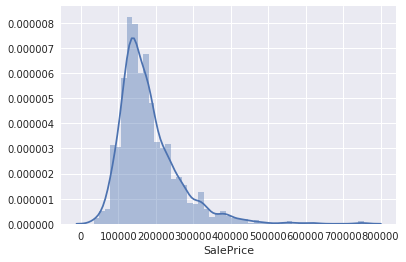

In [288]:
sns.distplot(train.SalePrice)

In [289]:
# 目的変数を対数変換
train.SalePrice = np.log(train.SalePrice)

In [290]:
X = train.drop('SalePrice',axis = 1)

In [291]:
y = train.SalePrice

In [292]:
from sklearn.preprocessing import StandardScaler

In [293]:
ss = StandardScaler()

In [295]:
X = ss.fit_transform(X_train)

#  線形回帰モデル単一の評価

In [368]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [369]:
#テストデータの分割
from  sklearn.model_selection import train_test_split

In [370]:
 X_train, X_test, Y_train, Y_test  = train_test_split(X, y,train_size=0.8)

In [426]:
#訓練データの学習
lr.fit( X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [427]:
Y_train.shape

(1168,)

In [428]:
#テストデータを予測
lr_y_pred = lr.predict(X_test)

In [429]:
lr_y_pred.shape

(292,)

In [419]:
svm_y_pred.shape

(292,)

In [420]:
tree_y_pred.shape

(292,)

In [373]:
#平均２乗誤差
from sklearn.metrics import mean_squared_error

In [374]:
mean_squared_error(Y_test, y_pred)

0.28926459964029233

# ラッソ回帰単一の評価

In [375]:
from sklearn.linear_model import Lasso

In [376]:
lasso = Lasso()

In [377]:
lasso.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [378]:
lasso_y_pred = lasso.predict(X_test)

In [379]:
mean_squared_error(Y_test, lasso_y_pred)

0.15735265335131446

# リッジ回帰単一の評価

In [380]:
from sklearn.linear_model import Ridge

In [381]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [382]:
ridge_y_pred = ridge.predict(X_test)

In [383]:
mean_squared_error(Y_test, ridge_y_pred)

0.016464274501235106

#  SVM

In [384]:
from sklearn.svm import SVR
svm = SVR()

In [385]:
svm.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [386]:
svm_y_pred =svm.predict(X_test)

In [387]:
mean_squared_error(Y_test,svm_y_pred)

0.028865473148460778

# 決定木

In [388]:
 # モデルを作成
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [389]:
#決定木は特に前処理をしない
train = pd.read_csv('input/train.csv')
X_train = train[num_f]
X_train, X_test, Y_train, Y_test  = train_test_split(X_train, y,train_size=0.8)

In [390]:
train[num_f].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [391]:
tree_y_pred =tree.predict(X_test)

In [392]:
mean_squared_error(Y_test,tree_y_pred )

0.697549308489891

# ブレンディング

# 2つのモデルでブレンディング

In [393]:
tree_svm_pred = (tree_y_pred+svm_y_pred) /2

In [394]:
mean_squared_error(Y_test,tree_svm_pred )

0.2903139376423128

In [395]:
lasso_tree_pred =  (tree_y_pred+lasso_y_pred) /2

In [396]:
mean_squared_error(Y_test,lasso_tree_pred  )

0.2573426998278902

In [397]:
svm_lasso_pred = (lasso_y_pred+svm_y_pred) /2

In [398]:
mean_squared_error(Y_test,svm_reg_pred)

0.1822203818832476

In [405]:
tree_lr_pred = (tree_y_pred+lr_y_pred ) /2

In [406]:
mean_squared_error(Y_test,tree_lr_pred)

0.28469676438015884

In [407]:
svm_reg_pred =( svm_y_pred+lr_y_pred)/2

In [408]:
mean_squared_error(Y_test,svm_reg_pred)

0.26981588399330264

# 3つ以上でブレンディンング

# 線形回帰+決定木(前処理してない)+SVR 

In [401]:
svm_lr_tree_pred = (svm_y_pred+lr_y_pred  +tree_y_pred )/3

In [403]:
mean_squared_error(Y_test,svm_lr_tree_pred  )

0.23701453420470742

# svm_lasso_pred　　svm_reg_pred　svm_lr_tree_pred で単一モデルの精度を超えた。

# バギング
モデルに使う学習用データをブートストラップサンプリングによって得て、その学習した
モデルを使って最後にアンサンブルする

In [409]:
from sklearn import cross_validation, preprocessing, ensemble

In [413]:
reg = ensemble.BaggingRegressor(DecisionTreeRegressor())

In [414]:
y_bagging_pred = reg.fit(X_train, Y_train).predict((X_test))

In [415]:
mean_squared_error(Y_test,y_bagging_pred )

0.022455615078177265

# スタッキング

In [441]:
ntrain = X_train.shape[0]

In [525]:
ntest = X_test.shape[0]
from sklearn.cross_validation import KFold
n_folds= 3

In [478]:
 kf = KFold(ntrain, n_folds= 3, random_state=0)

# 学習データをk個用意

In [706]:
train = pd.read_csv('input/train.csv')

In [707]:
train.SalePrice = np.log(train.SalePrice)

In [708]:
train.SalePrice.shape

(1460,)

In [709]:
y.shape

(1460,)

In [710]:
train = train[num_f]

In [711]:
train.shape

(1460, 34)

In [712]:
train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,14115,5,5,1993,1995,732,0,64,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,10084,8,5,2004,2005,1369,0,317,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,10382,7,6,1973,1973,859,32,216,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,6120,7,5,1931,1950,0,0,952,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,7420,5,6,1939,1950,851,0,140,...,205,0,4,0,0,0,0,0,1,2008


In [756]:
 kf = KFold(train.shape[0], n_folds= 3, random_state=0)

# ステージ０で、各モデルの予測値を算出し、それ特徴（oof）としてステージ１のモデルに学習させる

In [757]:
lr_pred_list = np.zeros(train.shape[0])
tree_pred_list = np.zeros(train.shape[0])
#ステージ０
for train_index, val_index in kf:

    lr = linear_model.LinearRegression()
    tree= DecisionTreeRegressor(max_depth=3)
    #学習
    lr.fit(train.iloc[train_index],y.iloc[train_index])
    #予測値
    lr_pred_list[val_index] = lr.predict(train.iloc[val_index])
    #学習
    tree.fit(train.iloc[train_index],y.iloc[train_index])
    #予測値
    tree_pred_list[val_index] = tree.predict(train.iloc[val_index])

In [768]:
lr_pred_list = lr_pred_list[:,np.newaxis]

In [769]:
tree_pred_list = tree_pred_list[:,np.newaxis]

In [1]:
#　各モデルで算出した予測値を結合させる

In [773]:
f = np.hstack((lr_pred_list, tree_pred_list))

# ステージ１としてリッジ回帰を使用 

In [774]:
ridge = Ridge()
ridge.fit(f,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [777]:
stacked = ridge.predict(f)

In [780]:
mean_squared_error(y,stacked )

0.02398429395745307

#  単一モデルの精度を超えなかった

# ステージ１として線形SVRを使用

In [781]:
from sklearn.svm import SVR
svm = SVR()

In [782]:
svm.fit(f,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [783]:
stacked = svm.predict(f)

In [784]:
mean_squared_error(y,stacked )

0.01912459270430008

# 単一のモデルの精度を超えた